## Verification on Sampled Data

In [9]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import chain
from networkx.algorithms import community

%matplotlib inline

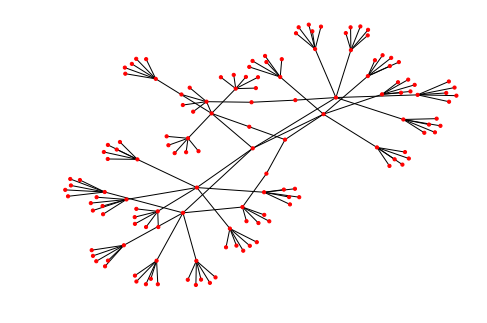

In [10]:
df = pd.read_csv("./edge_sample.csv")[['V1', 'V2']]
G = nx.from_pandas_edgelist(df, 'V1', 'V2')
nx.draw(G, with_labels=False, node_size=[10 for _ in range(df.shape[0])])

In [11]:
coms = community.girvan_newman(G)
for i in coms:
    if len(i) == 5:
        lvl5_com = i

In [13]:
len(lvl5_com)

5

In [4]:
com1_nodes = list(lvl5_com[0])
com1_edges = df.loc[(df['V1'].isin(com1_nodes)) & (df['V2'].isin(com1_nodes))]
assert(set(com1_edges['V1'].unique()).issubset(set(com1_nodes)) and 
       set(com1_edges['V2'].unique()).issubset(set(com1_nodes)))

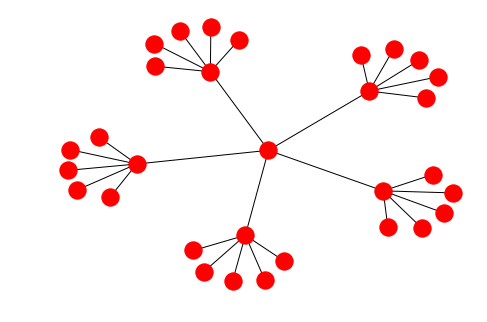

In [5]:
com1_g = nx.from_pandas_edgelist(com1_edges, 'V1', 'V2')
nx.draw(com1_g, with_labels=False)